# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from  scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(mouse_metadata, study_results,on=["Mouse ID"])

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [68]:
# Checking the number of mice.
mouse = mouse_study_results["Mouse ID"].value_counts()
number_of_mouse = len(mouse)
number_of_mouse

249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = mouse_study_results[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [70]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mouseid = pd.DataFrame(duplicate_mouse)
all_duplicate_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_results[mouse_study_results["Mouse ID"].isin(duplicate_mouse)==False]

In [72]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse = cleaned_df["Mouse ID"].value_counts()
cleaned_mouse_number = len(cleaned_mouse)
cleaned_mouse_number

249

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_regimen_mean

drug_regimen_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_regimen_median

drug_regimen_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_regimen_variance

drug_regimen_standard_deviation = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_regimen_standard_deviation

drug_regimen_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
drug_regimen_sem

drug_regimen_summary_stats_table = pd.DataFrame({"Mean":drug_regimen_mean, "Median":drug_regimen_median,
                                                 "Variance":drug_regimen_variance, "Standard Deviation":drug_regimen_standard_deviation,
                                                 "Sem":drug_regimen_sem})
drug_regimen_summary_stats_table

print(drug_regimen_summary_stats_table)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


                   Mean     Median   Variance  Standard Deviation       Sem
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#s_groupby = cleaned_df.groupby('Drug Regimen')
#drug_regimen_summary_stats_table2 = s_groupby.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volue (mm3)"]
#drug_regimen_summary_stats_table2
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

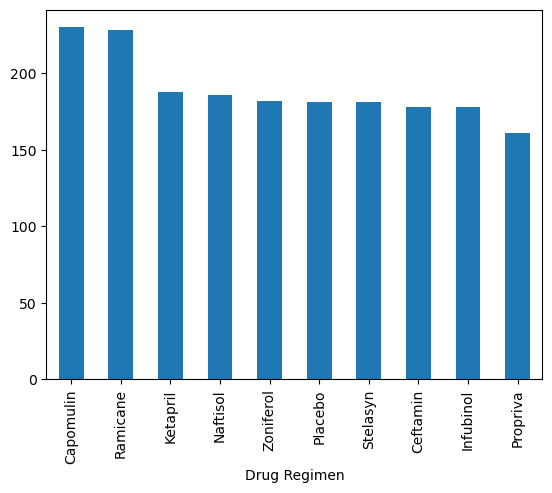

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count_per_treatment = mouse_study_results.groupby(['Drug Regimen']).count()['Timepoint']

mouse_count_per_treatment.sort_values(ascending=False).plot.bar()
plt.show()

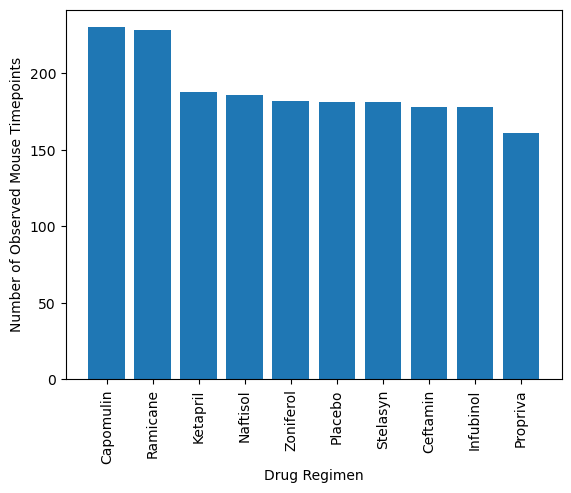

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_drug_des = mouse_count_per_treatment.sort_values(ascending=False)
plt.bar(timepoint_drug_des.index, timepoint_drug_des.values)
plt.ylabel('Number of Observed Mouse Timepoints',size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Sex'>

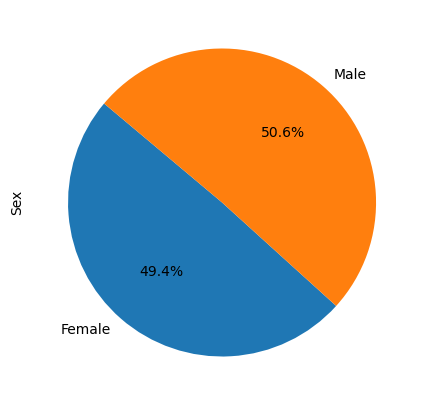

In [77]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
groupby_gender_count = cleaned_df.groupby(["Mouse ID", "Sex"])
groupby_gender_count
gender_count_df = pd.DataFrame(groupby_gender_count.size())

# Get the unique mice with their gender
gender = pd.DataFrame(gender_count_df.groupby(["Sex"]).count())
gender.columns =["Total Count"]

gender["Percentage of Sex"] = (100*(gender["Total Count"]/gender["Total Count"].sum()))
gender["Percentage of Sex"] = gender["Percentage of Sex"]
gender

# Make the pie chart

sex = cleaned_df.groupby(['Sex'])['Sex'].count()
# plotted chart using pandas .plot.pie() with customizations
sex.plot.pie(startangle=140,autopct='%1.1f%%', figsize=(5, 5))

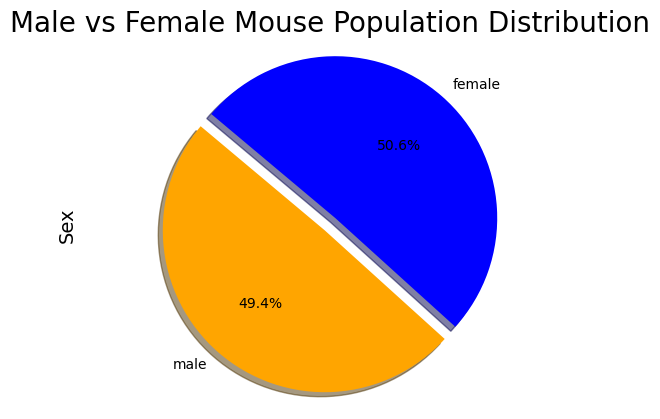

In [78]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["male", "female"]
sizes = [49.4, 50.6]
colors = ["orange", "blue"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.axis("equal")
plt.title("Male vs Female Mouse Population Distribution", fontsize = 20)
plt.ylabel('Sex', fontsize = 14)
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_Fin = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_Vol = pd.DataFrame(Capomulin_Fin)
Capomulin_Merged = pd.merge(Capomulin_Vol, mouse_study_results, on=("Mouse ID","Timepoint"),how="left")
Capomulin_Merged.head()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
Camp_Tumor = Capomulin_Merged["Tumor Volume (mm3)"]
quartiles = Camp_Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor:{lowerq}")
print(f"The upper quartile of Capomulin Tumor:{upperq}")
print(f"The interquartile of Capomulin Tumor:{iqr}")
print(f"The median of Capomulin Tumor:{quartiles[0.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq-(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


The lower quartile of Capomulin Tumor:32.37735684
The upper quartile of Capomulin Tumor:40.1592203
The interquartile of Capomulin Tumor:7.781863460000004
The median of Capomulin Tumor:38.1251644
Values below 20.70456164999999 could be outliers.
Values below 28.486425109999995 could be outliers.


In [81]:
Camp_Tumor = Capomulin_Merged["Tumor Volume (mm3)"]
quartiles = Camp_Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor:{lowerq}")
print(f"The upper quartile of Capomulin Tumor:{upperq}")
print(f"The interquartile of Capomulin Tumor:{iqr}")
print(f"The median of Capomulin Tumor:{quartiles[0.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq-(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumor:32.37735684
The upper quartile of Capomulin Tumor:40.1592203
The interquartile of Capomulin Tumor:7.781863460000004
The median of Capomulin Tumor:38.1251644
Values below 20.70456164999999 could be outliers.
Values below 28.486425109999995 could be outliers.


In [82]:
Ramicane_Fin = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_Vol = pd.DataFrame(Ramicane_Fin)
Ramicane_Merged = pd.merge(Ramicane_Vol, mouse_study_results, on=("Mouse ID","Timepoint"),how="left")
Ramicane_Merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [83]:
Rami_Tumor = Ramicane_Merged["Tumor Volume (mm3)"]

quartiles =Rami_Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumor is: {lowerq}")
print(f"The upper quartile of Ramicane tumor is: {upperq}")
print(f"The interquartile range of Ramicane tumor is: {iqr}")
print(f"The median of Ramicane tumor is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor is: 31.56046955
The upper quartile of Ramicane tumor is: 40.65900627
The interquartile range of Ramicane tumor is: 9.098536719999998
The median of Ramicane tumor is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [84]:
Infub_Fin = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infub_Vol = pd.DataFrame(Infub_Fin)
Infubinol_Merged = pd.merge(Infub_Vol, mouse_study_results, on=("Mouse ID","Timepoint"),how="left")
Infubinol_Merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [85]:
Infub_Tumor = Infubinol_Merged["Tumor Volume (mm3)"]

quartiles = Infub_Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumor is: {lowerq}")
print(f"The upper quartile of Ramicane tumor is: {upperq}")
print(f"The interquartile range of Ramicane tumor is: {iqr}")
print(f"The median of Ramicane tumor is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor is: 31.56046955
The upper quartile of Ramicane tumor is: 40.65900627
The interquartile range of Ramicane tumor is: 9.098536719999998
The median of Ramicane tumor is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [86]:
Ceftamin_Fin = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_Vol = pd.DataFrame(Ceftamin_Fin)
Ceftamin_Merged = pd.merge(Ceftamin_Vol, mouse_study_results, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_Merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [87]:
Cefta_Tumor = Ceftamin_Merged["Tumor Volume (mm3)"]

quartiles = Infub_Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumor is: {lowerq}")
print(f"The upper quartile of Ramicane tumor is: {upperq}")
print(f"The interquartile range of Ramicane tumor is: {iqr}")
print(f"The median of Ramicane tumor is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor is: 31.56046955
The upper quartile of Ramicane tumor is: 40.65900627
The interquartile range of Ramicane tumor is: 9.098536719999998
The median of Ramicane tumor is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


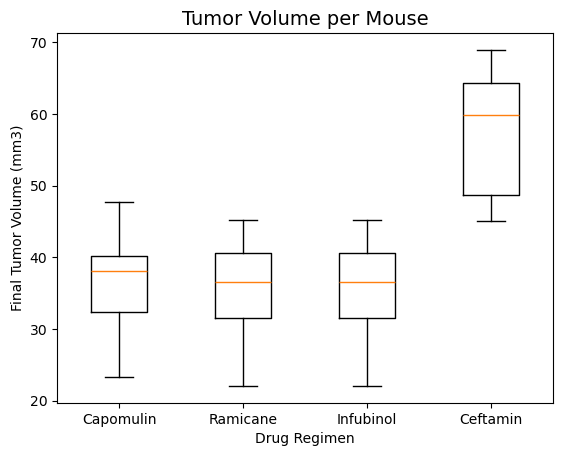

In [88]:
Tumor_Boxplot = [Camp_Tumor, Rami_Tumor,Infub_Tumor,Cefta_Tumor]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Mouse', fontsize = 14)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen', fontsize = 10)
ax1.boxplot(Tumor_Boxplot, labels=Drug_Regimen)
plt.show()

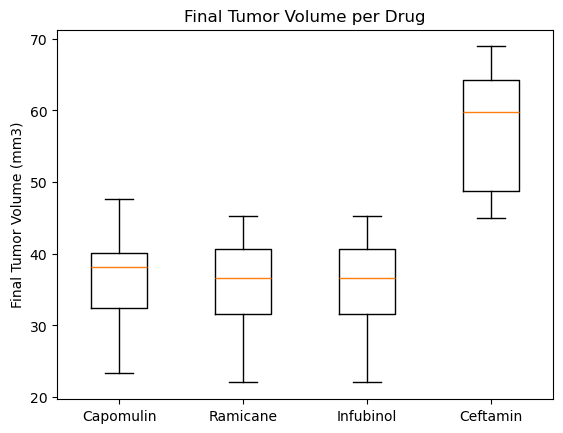

In [89]:
Tumor_Boxplot = [Camp_Tumor, Rami_Tumor,Infub_Tumor,Cefta_Tumor]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(Tumor_Boxplot, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume per Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()
#Tried different ways to show the red dot. It still didn't show.

 ##Line and Scatter Plots

In [90]:
Tumor_Line_Plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
Tumor_Line_Plot.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


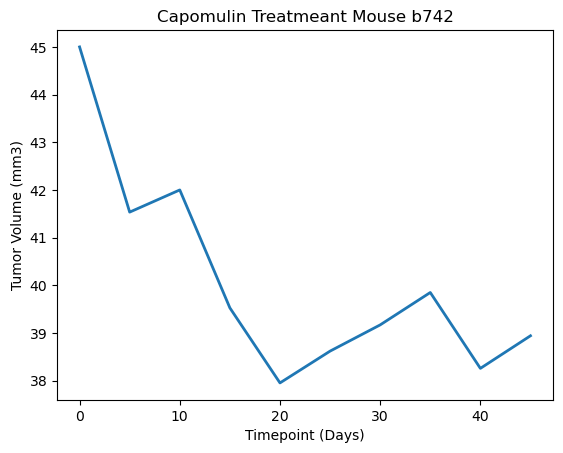

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
X_Axis_Time = Tumor_Line_Plot["Timepoint"]
Y_Axis_Tumor_Vol = Tumor_Line_Plot["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant Mouse b742') 

plt.plot(X_Axis_Time, Y_Axis_Tumor_Vol,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

## Correlation and Regression

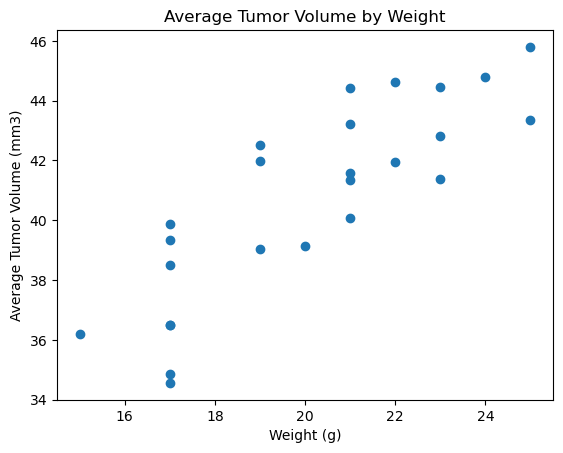

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Only looking at the affects of Capomulin
Capomulin_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin",:]

#Find the average in Campomulin
Average_Vol_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average_Tumor_Volume'})

# Merge average tumor volume dataframe onto mouse study results dataframe (first merged dataframe) and drop duplicates
Average_Vol_df = pd.merge(Capomulin_df, Average_Vol_df, on='Mouse ID')
Fin_Average_Vol_df = Average_Vol_df[['Weight (g)', 'Average_Tumor_Volume']].drop_duplicates()
Fin_Average_Vol_df

#Assign x and y variables to the x and y axises
x = Fin_Average_Vol_df['Weight (g)']
y = Fin_Average_Vol_df['Average_Tumor_Volume']

# Create a Scatterplot
plt.scatter(x, y)

# Scatterplot labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

In [96]:
#Correlation Coefficient Equation (Calculate) to find the relationship between mouse weight and average tumor volume
corr = st.pearsonr(x, y)
print(f"""The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.""")

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


In [97]:
#Recreate the scatterplot using the code from before
Capomulin_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin",:]
Average_Vol_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average_Tumor_Volume'})
Average_Vol_df = pd.merge(Capomulin_df, Average_Vol_df, on='Mouse ID') 
Fin_Average_Vol_df = Average_Vol_df[['Weight (g)', 'Average_Tumor_Volume']].drop_duplicates()
Fin_Average_Vol_df

,Weight (g),Average_Tumor_Volume
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495
45,17,38.506829
55,17,36.509212
65,19,39.049816
75,17,39.328725
85,20,39.141053


In [98]:
#x and y variables for the scatterplot's x and y axises
x = Fin_Average_Vol_df['Weight (g)']
y = Fin_Average_Vol_df['Average_Tumor_Volume']

#Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

#Print caluculations of the line regression
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

#y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241048
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694722
pandas (Correlation coefficient):PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712608e-07)
stderr:0.12754359033201318
y = 0.95x + 21.55


NameError: name 'lin_eq' is not defined

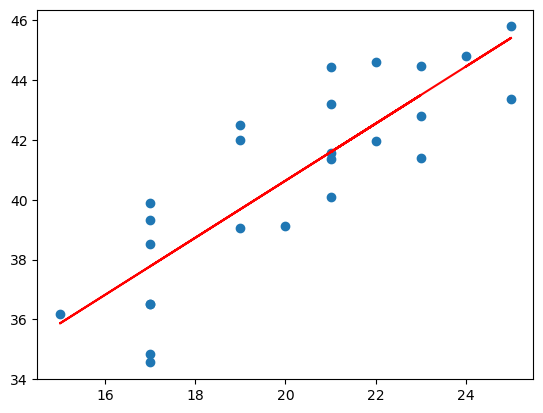

In [99]:
#Plot the scatter plot using the x and y variables
plt.scatter(x,y)
plt.plot(x, regress_values, "r-")

#Annotate lin. regress.
plt.annotate(lin_eq,(20,37),fontsize=16, color="red")

#Plot the scatterplot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor by Mouse Weight")
plt.show()